<a href="https://colab.research.google.com/github/RohanRanshinge/USA_Shootings/blob/master/Shootings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
shootings = pd.read_csv("https://raw.githubusercontent.com/RohanRanshinge/Assignment2/master/Mass%20Shootings%20Dataset%20Ver%205.csv", encoding = "ISO-8859-1")
shootings.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [0]:
shootings[['Fatalities','Race']].groupby('Race',as_index=False).count().sort_values(by='Fatalities',ascending=False)
shootings.replace(['White American or European American','white','White','White American or European American/Some other Race','Black American or African American/Unknown','Black','black','Black American or African American','African American'],['White','White','White','White','African American','African American','African American','African American','African American'],inplace=True)

In [0]:
shootings.replace(['Asian American','Asian American/Some other race'],['Asian','Asian'],inplace=True)
shootings.replace(['Some other race','Two or more races','Other'],['Unknown','Unknown','Unknown'],inplace=True)
shootings[['Race','Fatalities']].groupby('Race',as_index=False).count().sort_values(by='Fatalities',ascending=False)

,Race,Fatalities
5,White,144
0,African American,85
4,Unknown,66
1,Asian,18
2,Latino,5
3,Native American or Alaska Native,3


In [0]:
shootings.replace(['M','M/F'],['Male','Male/Female'],inplace=True)
shootings[['Gender','Fatalities']].groupby('Gender',as_index=False).count().sort_values(by='Fatalities',ascending=False)

,Gender,Fatalities
1,Male,292
3,Unknown,21
0,Female,5
2,Male/Female,5


Text(0, 0.5, 'Fatalities')

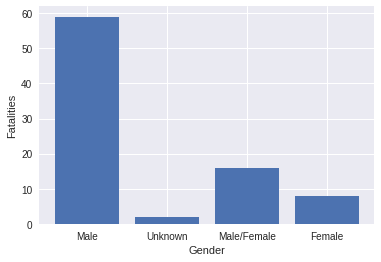

In [0]:
plt.bar(shootings['Gender'],shootings['Fatalities'],align='center')
plt.xlabel('Gender')
plt.ylabel('Fatalities')

In [0]:
shootings.fillna('Unknown',inplace=True)

Text(0, 0.5, 'Fatalities')

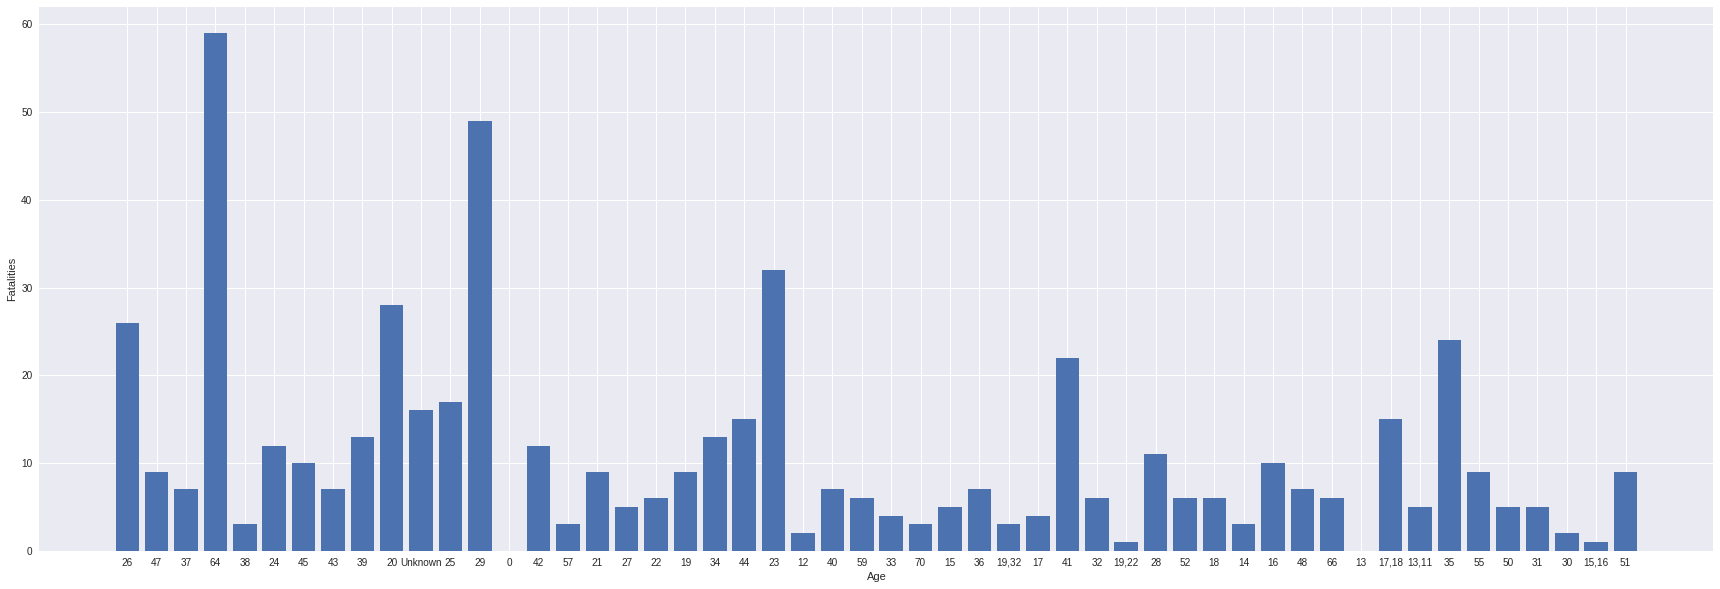

In [0]:
plt.figure(figsize=(30,10))
plt.bar(shootings['Age'],shootings['Fatalities'],align='center')
plt.xlabel('Age')
plt.ylabel('Fatalities')

<BarContainer object of 323 artists>

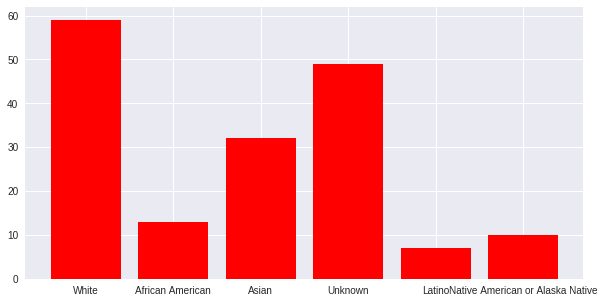

In [0]:
plt.figure(figsize=(10,5))
plt.bar(shootings['Race'],shootings['Fatalities'],align='center',color='#FF0000')
